In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data = pd.concat([train, test], axis=0)

In [6]:
data.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006
1458,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,...,WD,0,Pave,9,996.0,AllPub,190,1993,1994,2006


In [7]:
cols = ['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'YearBuilt',\
        'RoofStyle', 'Exterior1st', 'ExterCond', 'CentralAir',  'HalfBath']

In [8]:
data[cols].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath
0,RL,65.0,8450,NaN,7,2003,Gable,VinylSd,TA,Y,1
1,RL,80.0,9600,NaN,6,1976,Gable,MetalSd,TA,Y,0
2,RL,68.0,11250,NaN,7,2001,Gable,VinylSd,TA,Y,1
3,RL,60.0,9550,NaN,7,1915,Gable,Wd Sdng,TA,Y,0
4,RL,84.0,14260,NaN,8,2000,Gable,VinylSd,TA,Y,1


In [9]:
data[cols].shape

(2919, 11)

In [10]:
data[cols].describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,HalfBath
count,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,1971.312778,0.380267
std,23.344905,7886.996359,1.409947,30.291442,0.502872
min,21.000000,1300.000000,1.000000,1872.000000,0.000000
25%,59.000000,7478.000000,5.000000,1953.500000,0.000000
50%,68.000000,9453.000000,6.000000,1973.000000,0.000000
75%,80.000000,11570.000000,7.000000,2001.000000,1.000000
max,313.000000,215245.000000,10.000000,2010.000000,2.000000


In [11]:
for col in cols:
    print(data[col].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
140.0      2
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
25.0       1
123.0      1
135.0      1
111.0      1
117.0      1
131.0      1
200.0      1
22.0       1
136.0      1
28.0       1
31.0       1
133.0      1
155.0      1
153.0      1
126.0      1
152.0      1
168.0      1
144.0      1
138.0      1
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
9600     44
7200     43
6000     34
9000     29
10800

## Notes
- MSZoning: Categorical
- LotFrontage: Numerical Continuous
- LotArea: Numerical Continuous
- Alley: Categorical
- OverallQual: Ordinal
- YearBuilt: Numerical Discrete
- RoofStyle: Categorical
- Exterioirlst: Categorical
- ExterCond: Categorical
- CentralAir: Categorical
- HalfBath: Oridinal

In [12]:
for col in cols:
    print('{}: {}: {}%'.format(col, train[col].isnull().sum(), data[col].isnull().sum()*100/data[col].shape[0]))

MSZoning: 0: 0.1370332305584104%
LotFrontage: 259: 16.649537512846866%
LotArea: 0: 0.0%
Alley: 1369: 93.21685508735868%
OverallQual: 0: 0.0%
YearBuilt: 0: 0.0%
RoofStyle: 0: 0.0%
Exterior1st: 0: 0.0342583076396026%
ExterCond: 0: 0.0%
CentralAir: 0: 0.0%
HalfBath: 0: 0.0%


## MSZoning: Identifies the general zoning classification of the sale.
		
- A  : Agriculture
- C  : Commercial
- FV : Floating Village Residential
- I	 : Industrial
- RH : Residential High Density
- RL : Residential Low Density
- RP : Residential Low Density Park 
- RM : Residential Medium Density

In [13]:
mszoning = data[data['MSZoning'].isnull() == False]['MSZoning']

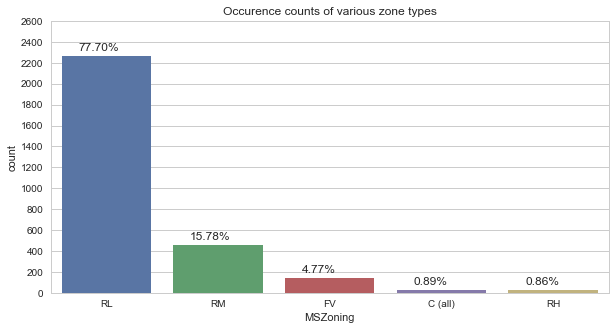

In [14]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = sns.countplot(x=mszoning, orient="v", order=['RL', 'RM', 'FV', 'C (all)', 'RH'])
ax.set_title('Occurence counts of various zone types')
ps = ((mszoning.value_counts() / mszoning.shape[0]) * 100).values
for i, p in enumerate(ax.patches):
    ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.15, p.get_height()+50))
ax.set_yticks(np.arange(0, 2800, 200))
fig.add_subplot(ax)
fig.set_size_inches(10, 5)

### Remarks:
- 77.7% of all the properties that have been considered for selling are residential areas with low population density.
- 15.78% of all the properties that have been considered for selling are residential areas with medium population density.
- We can infer from the above data that there is a high demand of residential area which have medium to low densities

## LotFrontage: Linear feet of street connected to property

In [15]:
lotfrontage = data[data['LotFrontage'].isnull() == False]['LotFrontage']

In [16]:
lotfrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

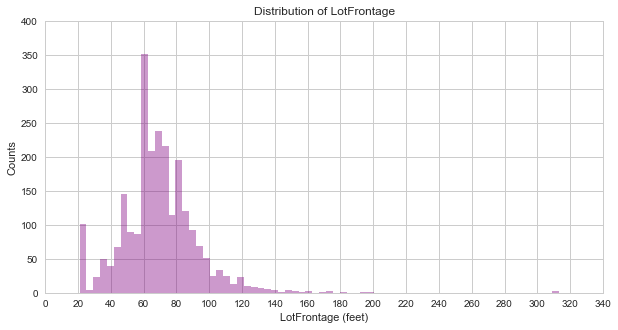

In [17]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = sns.distplot(a=lotfrontage, kde=False, color='purple', bins=70)
ax.set_title('Distribution of LotFrontage')
ax.set_yticks(np.arange(0, 450, 50))
ax.set_xticks(np.arange(0, 350, 20))
ax.set_ylabel('Counts')
ax.set_xlabel('LotFrontage (feet)')
fig.add_subplot(ax)
fig.set_size_inches(10, 5)

In [18]:
np.sort(lotfrontage.values)[-20:]

array([ 141.,  144.,  149.,  149.,  150.,  150.,  152.,  153.,  155.,
        160.,  160.,  160.,  168.,  174.,  174.,  182.,  195.,  200.,
        313.,  313.])

### Remarks:
- Most of the properties have street of lenght 60 to 80 feet connected to it.
- It is highly likely there are two outliers which have a 313 feet of street connected to the property. 

## LotArea: Lot size in square feet

In [19]:
lotarea = data[data['LotArea'].isnull() == False]['LotArea']

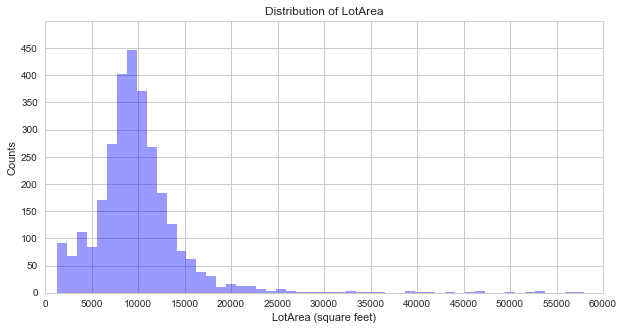

In [20]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = sns.distplot(a=lotarea, kde=False, color='blue', bins=200)
ax.set_title('Distribution of LotArea')
ax.set_xticks(np.arange(0, 250000, 5000))
ax.set_xlim(0, 60000)
ax.set_yticks(np.arange(0, 500, 50))
ax.set_ylim(0, 500)
ax.set_ylabel('Counts')
ax.set_xlabel('LotArea (square feet)')
fig.add_subplot(ax)
fig.set_size_inches(10, 5)

### Remarks:
- Most of the properties sold have a lot area of 5000 to 1000 square feet.
- We could conclude that large properties are sold rarely.

## Alley: Type of alley access to property
- Grvl:	Gravel
- Pave: Paved
- NA: 	No alley access

In [21]:
alley = data['Alley']
alley = alley.fillna('No Alley Access')
alley = alley.replace('Grvl', 'Gravel')
alley = alley.replace('Pave', 'Paved')

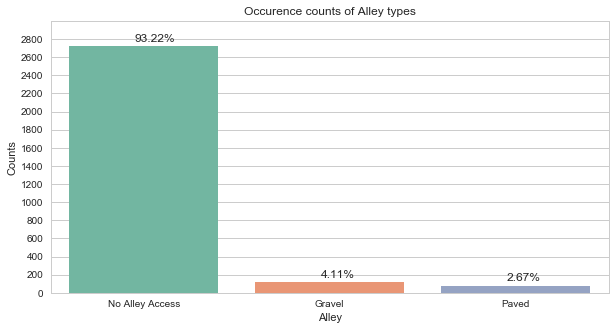

In [22]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = sns.countplot(x=alley, order=['No Alley Access', 'Gravel', 'Paved'], palette='Set2')
ax.set_title('Occurence counts of Alley types')
ax.set_yticks(np.arange(0, 3000, 200))
ax.set_ylim(0, 3000)
ps = ((alley.value_counts() / alley.shape[0]) * 100).values
for i, p in enumerate(ax.patches):
    ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.35, p.get_height() + 50))
ax.set_ylabel('Counts')
fig.add_subplot(ax)
fig.set_size_inches(10, 5)

### Remarks:
- Most of the properties that have been sold do not have an alley access.
- This could mean having an alley access could either be undesirable in general.